## Problem 4

## Python imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import dolfin as dl
import ufl
import math
import numpy as np
import logging
from unconstrainedMinimization import InexactNewtonCG

import hippylib as hp

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

## Set-up

1. Read the image from file
2. Build the mesh and finite element spaces
3. Interpolate the clean and noisy image to the finite element space

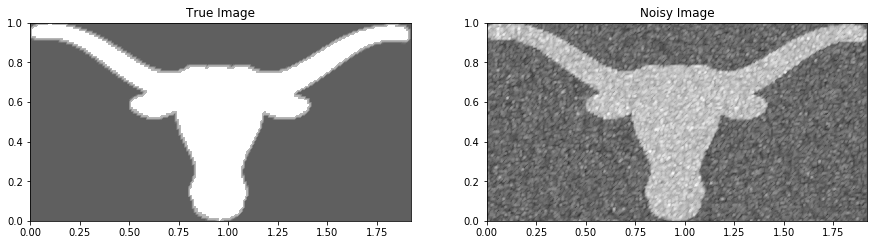

In [4]:
# Set the level of noise:
noise_std_dev = .3

# Load the image from file
data = np.transpose( np.loadtxt('image.dat', delimiter=',') )
np.random.seed(seed=1)

noise = noise_std_dev*np.random.randn(data.shape[0], data.shape[1])
Ly = 1.
Lx = float(data.shape[0])/float(data.shape[1])
h = Ly/float(data.shape[1])


mesh = dl.RectangleMesh(dl.Point(0,0),dl.Point(Lx,Ly), 200, 100)
V = dl.FunctionSpace(mesh, "Lagrange",1)

trueImage  = hp.NumpyScalarExpression2D()
trueImage.setData(data, h,h)
noisyImage = hp.NumpyScalarExpression2D()
noisyImage.setData(data+noise, h,h)

u_true  = dl.interpolate(trueImage, V)
u_0     = dl.interpolate(noisyImage, V)

vmin = np.min(u_0.vector().get_local())
vmax = np.max(u_0.vector().get_local())

plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
dl.plot(u_true, title="True Image", vmin=vmin, vmax = vmax, cmap='gray')
plt.subplot(1,2,2)
dl.plot(u_0, title="Noisy Image", vmin=vmin, vmax = vmax, cmap='gray')
plt.show()

Copyright (c) 2016, The University of Texas at Austin & University of California, Merced.

All Rights reserved.
See file COPYRIGHT for details.

This file is part of the hIPPYlib library. For more information and source code availability see https://hippylib.github.io.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.